## HELP International NGO - Country Aid Analysis

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

#### Steps Involved:
- Step 1: Reading & Understanding data
- Step 2: Data Cleaning
- Step 3: Data Visualization
- Step 4: Checking outliers in the features
- Step 5: Clustering
- Step 6: Final Result

In [114]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# Importing all libraries for clustering:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Step 1: Reading & Understanding data

In [12]:
# read the dataset
country_df = pd.read_csv("Country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [13]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [14]:
# Check for null values:

country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [15]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Step 2: Data Cleaning

- There are no missing values in this data set as we already saw.

In [16]:
# Converting columns from % to actual values:

country_df['exports'] = round(country_df['exports'] * country_df['gdpp']/100, 2)
country_df['health'] = round(country_df['health'] * country_df['gdpp']/100, 2)
country_df['imports'] = round(country_df['imports'] * country_df['gdpp']/100, 2)

In [17]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


### Step 3: Data Visualization

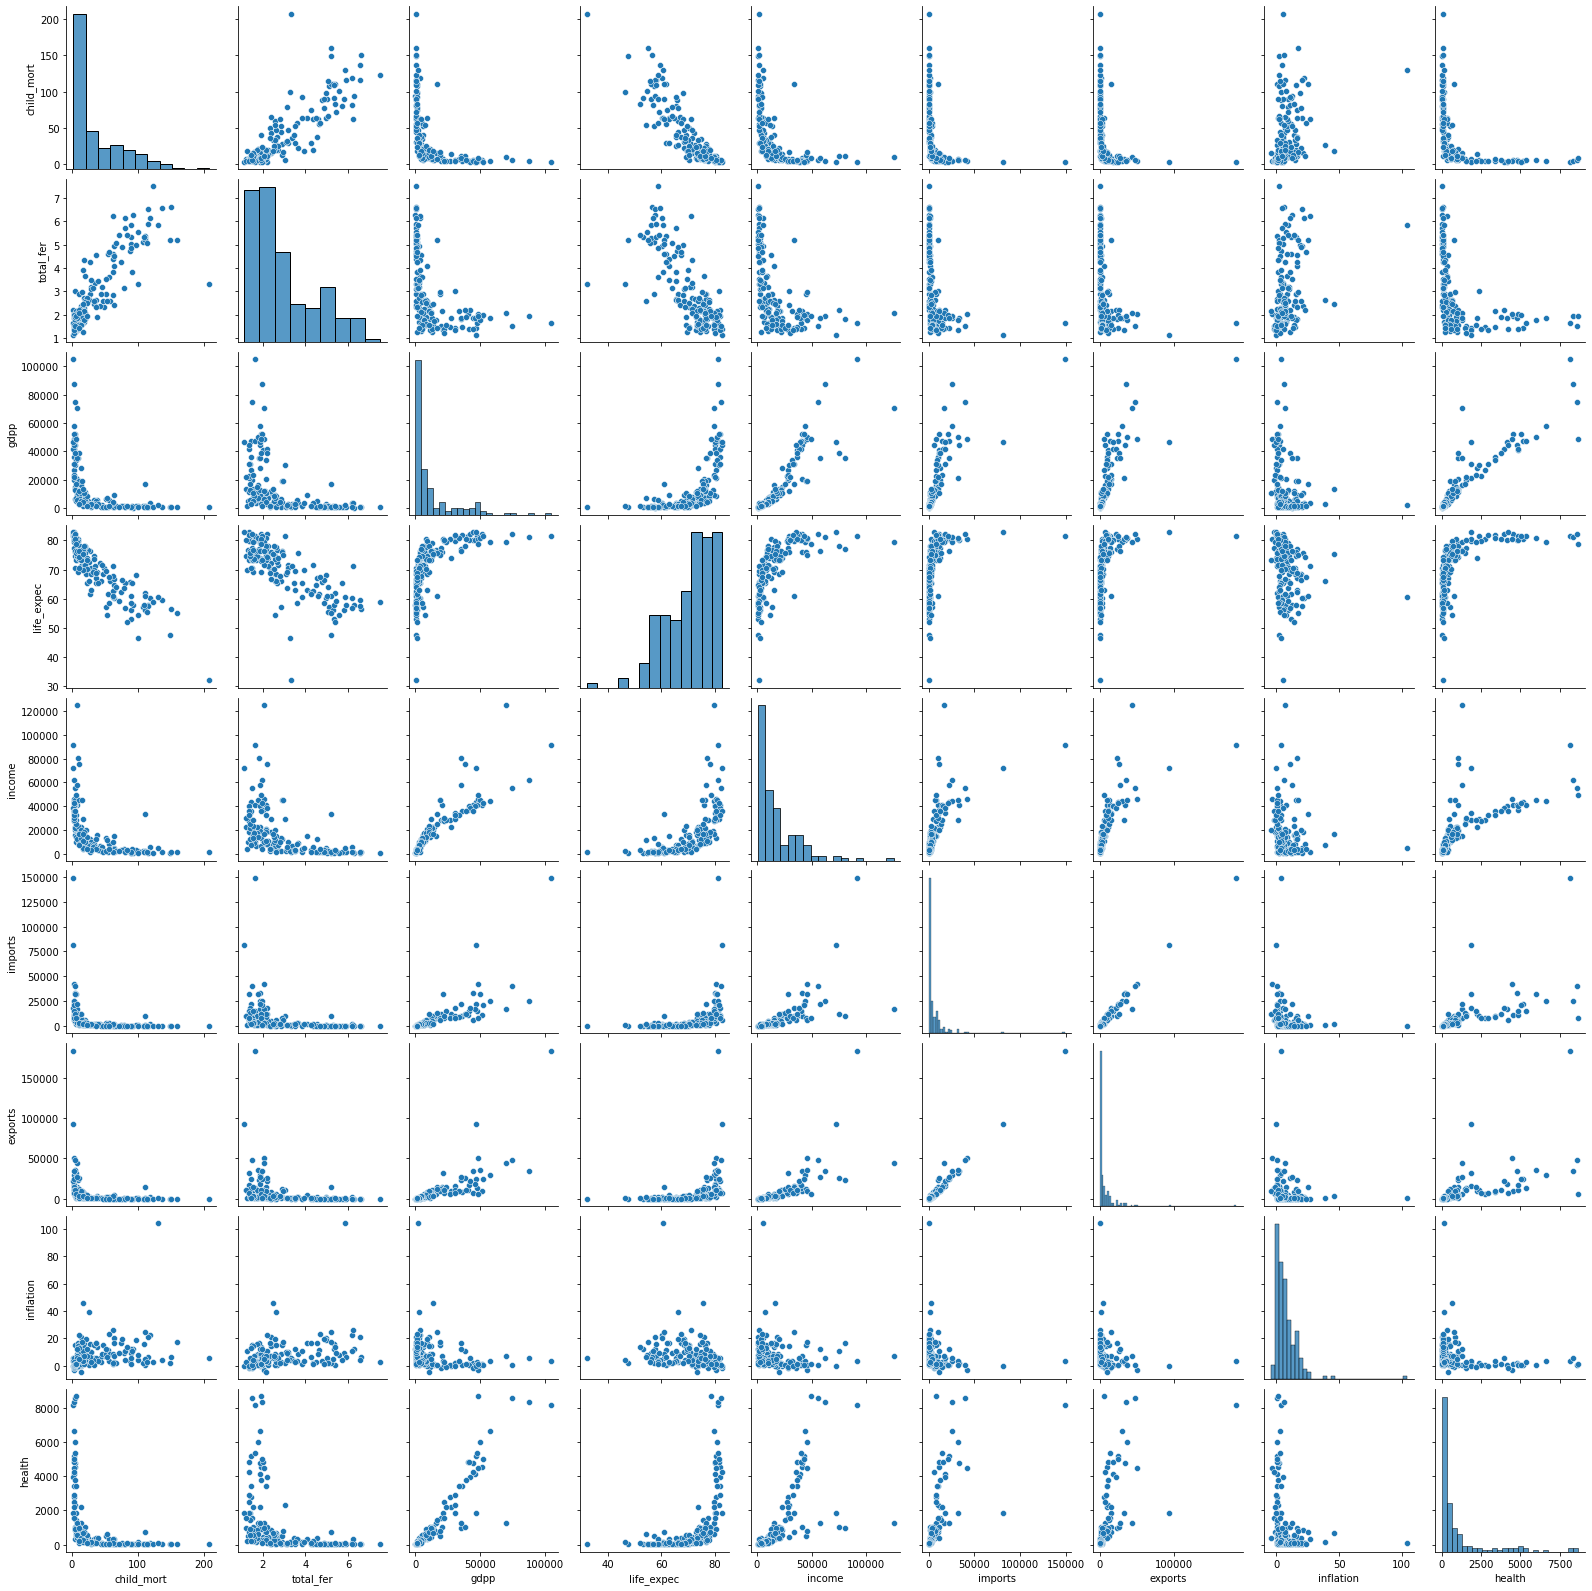

In [19]:
# Checking the pairplot to understand about the correlation between features:

sns.pairplot(country_df, vars=["child_mort", 'total_fer','gdpp','life_expec','income', 'imports', 'exports', 'inflation', 'health'], kind='scatter')
plt.show()

#### We will analyse variables and try to infer some insights.

#### Country vs Child Mortality

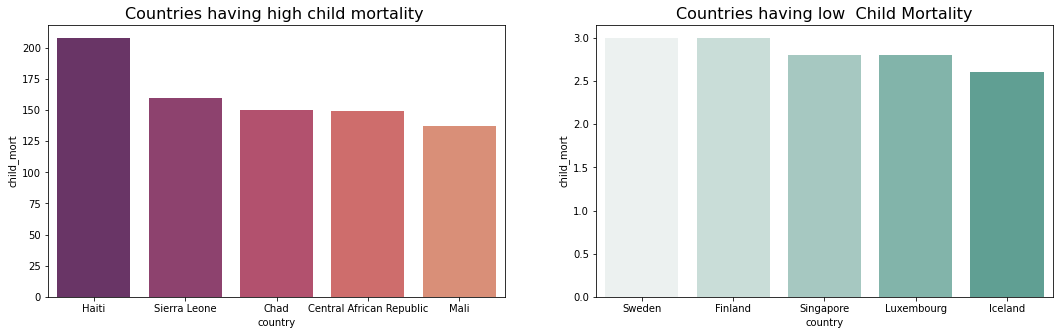

In [62]:
country = country_df.groupby('country').child_mort.sum().sort_values(ascending=False)
country = pd.DataFrame(country)
country1 = country.head()
country2 = country.tail()
# display(country1.head())  
# display(country2.tail())

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
sns.barplot(country1.index, country1.child_mort, palette='flare_r')
plt.title('Countries having high child mortality ', size=16)
plt.subplot(1,2,2)
sns.barplot(country2.index, country2.child_mort, palette='light:#5A9')
plt.title('Countries having low  Child Mortality', size=16)
plt.show()

#### Inference:
- From above it is seen that 'Halti' has the highest child mortality.
- Iceland has the lowest child mortality

### Country vs Income

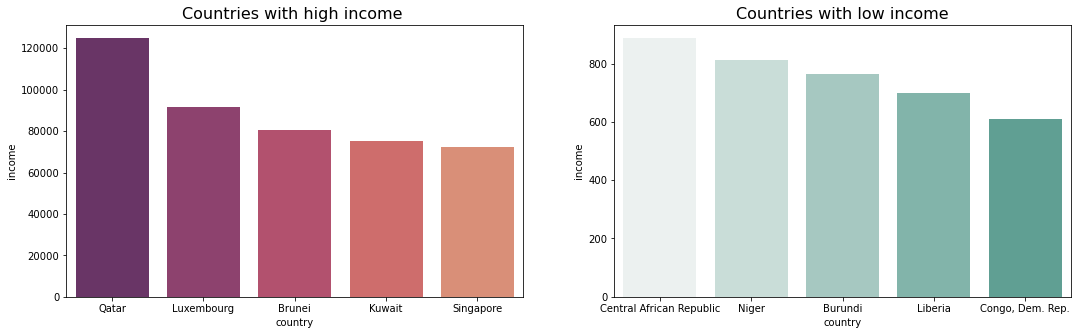

In [63]:
income = country_df.groupby('country').income.sum().sort_values(ascending=False)
income = pd.DataFrame(income)
income1 = income.head()
income2 = income.tail()
# display(income1)
# display(income2)

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
sns.barplot(income1.index, income1.income, palette='flare_r')
plt.title('Countries with high income ', size=16)
plt.subplot(1,2,2)
sns.barplot(income2.index, income2.income, palette='light:#5A9')
plt.title('Countries with low income', size=16)
plt.show()

#### Inference:
- Qatar has the highest income among all countries.
- Congo Democratic Republic has the lowest of income.

### Country vs Import

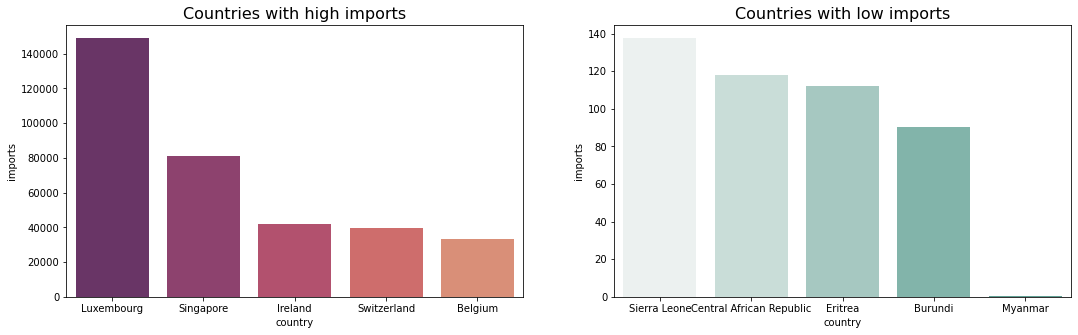

In [64]:
imports = country_df.groupby('country').imports.sum().sort_values(ascending=False)
imports = pd.DataFrame(imports)
imports1 = imports.head()
imports2 = imports.tail()
# display(imports1)
# display(imports2)

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
sns.barplot(imports1.index, imports1.imports, palette='flare_r')
plt.title('Countries with high imports', size=16)
plt.subplot(1,2,2)
sns.barplot(imports2.index, imports2.imports, palette='light:#5A9')
plt.title('Countries with low imports', size=16)
plt.show()

#### Inference:
- Luxembourg does the most import of services and goods.
- Myanmar does the least imports by large margin.

### Country vs Exports

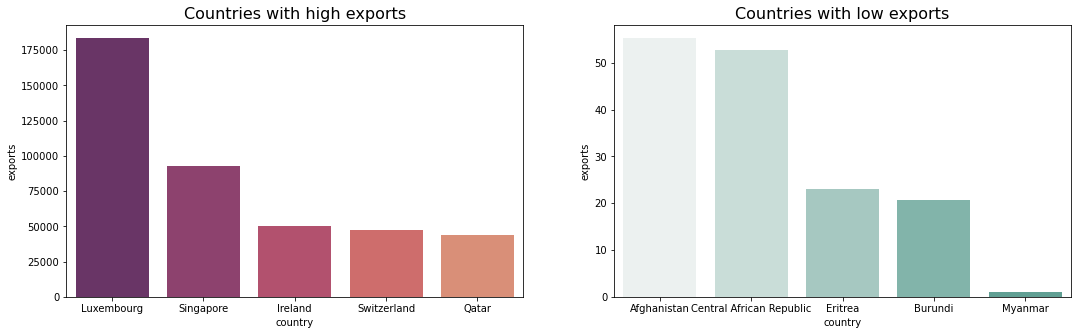

In [65]:
exports = country_df.groupby('country').exports.sum().sort_values(ascending=False)
exports = pd.DataFrame(exports)
exports1 = exports.head()
exports2 = exports.tail()
# display(exports1)
# display(exports2)

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
sns.barplot(exports1.index, exports1.exports, palette='flare_r')
plt.title('Countries with high exports', size=16)
plt.subplot(1,2,2)
sns.barplot(exports2.index, exports2.exports, palette='light:#5A9')
plt.title('Countries with low exports', size=16)
plt.show()

#### Inference:
- It is seen that the import and export are almost similar. The countries that import more are also exporting more.
- Again Luxembourg does the highest exports.
- Myanmar does the least export of goods and services.

### Country vs GDP

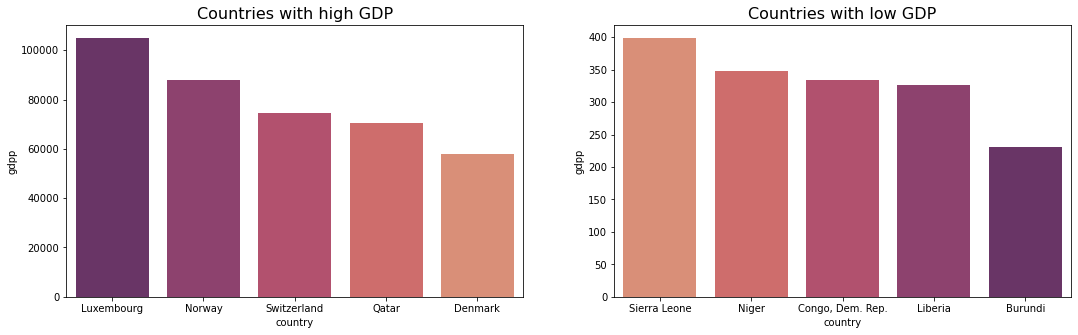

In [70]:
gdp= country_df.groupby('country').gdpp.sum().sort_values(ascending=False)
gdp=pd.DataFrame(gdp)
gdp1=gdp.head()
gdp2=gdp.tail()
# display(gdp1)
# display(gdp2)

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
sns.barplot(gdp1.index, gdp1.gdpp, palette='flare_r')
plt.title('Countries with high GDP', size=16)
plt.subplot(1,2,2)
sns.barplot(gdp2.index, gdp2.gdpp, palette='flare')
plt.title('Countries with low GDP', size=16)
plt.show()

#### Inference:
- Luxembourg has the highest GDP
- Burundi has the lowest GDP

### Country vs Life Expectancy

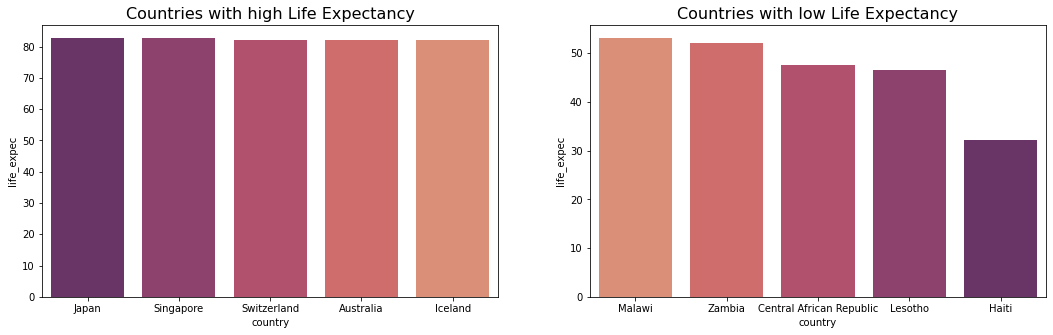

In [78]:
life= country_df.groupby('country').life_expec.sum().sort_values(ascending=False)
life=pd.DataFrame(life)
life1=life.head()
life2=life.tail()
# display(life1)
# display(life2)

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
sns.barplot(life1.index, life1.life_expec, palette='flare_r')
plt.title('Countries with high Life Expectancy', size=16)
plt.subplot(1,2,2)
sns.barplot(life2.index, life2.life_expec, palette='flare')
plt.title('Countries with low Life Expectancy', size=16)
plt.show()

#### Inference:
- Japan and Singapore tops the list with very high life expectancy. Also there are many other countries with very high life expectancy.
- Halti is the country with very low life expectancy of something around 32 years.

### Country vs Health

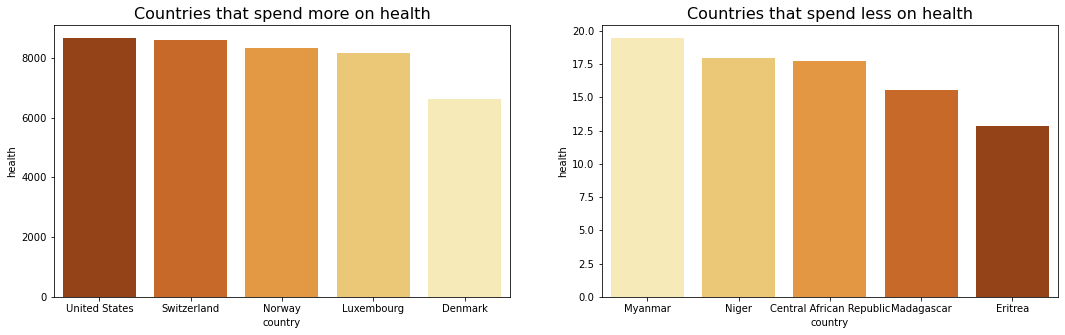

In [83]:
health= country_df.groupby('country').health.sum().sort_values(ascending=False)
health=pd.DataFrame(health)
health1=health.head()
health2=health.tail()
# display(health1)
# display(health2)

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
sns.barplot(health1.index, health1.health, palette='YlOrBr_r')
plt.title('Countries that spend more on health', size=16)
plt.subplot(1,2,2)
sns.barplot(health2.index, health2.health, palette='YlOrBr')
plt.title('Countries that spend less on health', size=16)
plt.show()

#### Inference:
- From above it is seen that, United States spend more on health per person.
- Eritrea spends the least on health per person.

### Country vs Fertility

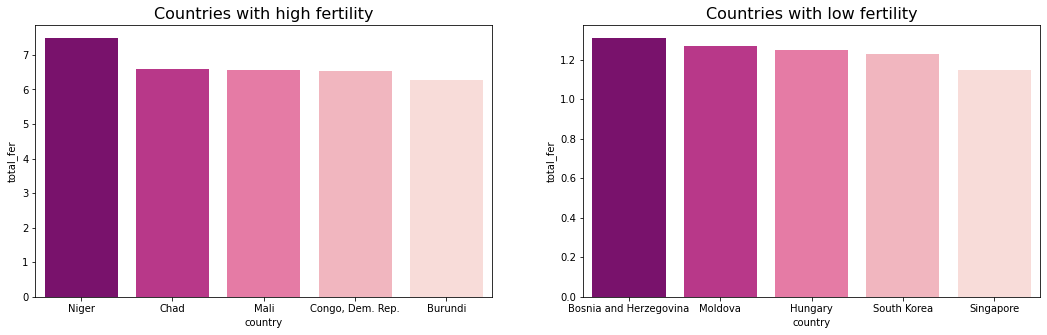

In [87]:
fert= country_df.groupby('country').total_fer.sum().sort_values(ascending=False)
fert=pd.DataFrame(fert)
fert1=fert.head()
fert2=fert.tail()
# display(fert1)
# display(fert2)

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
sns.barplot(fert1.index, fert1.total_fer, palette='RdPu_r')
plt.title('Countries with high fertility', size=16)
plt.subplot(1,2,2)
sns.barplot(fert2.index, fert2.total_fer, palette='RdPu_r')
plt.title('Countries with low fertility', size=16)
plt.show()

#### Inference:
- From above it is seen that Niger has the highest fertility rate.
- Singapore has the lowest fertility rate.

### Country vs Inflation

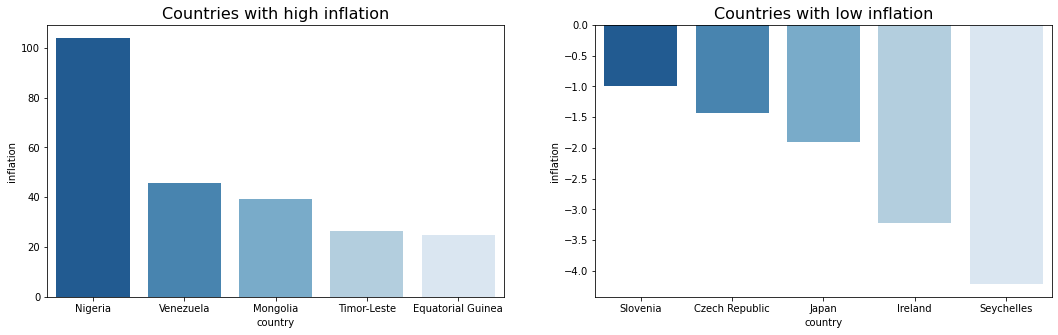

In [90]:
infl= country_df.groupby('country').inflation.sum().sort_values(ascending=False)
infl=pd.DataFrame(infl)
infl1=infl.head()
infl2=infl.tail()
# display(infl1)
# display(infl2)

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
sns.barplot(infl1.index, infl1.inflation, palette='Blues_r')
plt.title('Countries with high inflation', size=16)
plt.subplot(1,2,2)
sns.barplot(infl2.index, infl2.inflation, palette='Blues_r')
plt.title('Countries with low inflation', size=16)
plt.show()

#### Inference:
- From above we see that, Nigeria has the highest inflation rate.
- There are many countries with negative inflation. Seychelles has the least inflation rate.

### Income vs Child Mortality vs Fertility

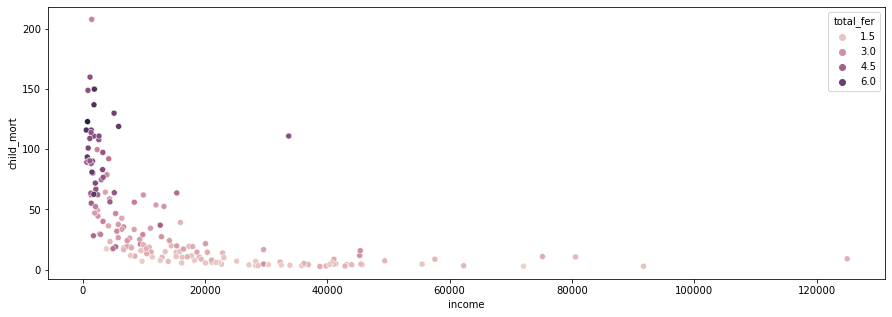

In [55]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='income',y='child_mort',hue='total_fer', data=country_df)
plt.show()

#### Inference:
- From above it is seen that, less income people have more child mortality. As the income increases, the mortality rate also decreases.
- Also low income and high fertility leads to high child mortality.

### Lets check the distribution of data in each variables:

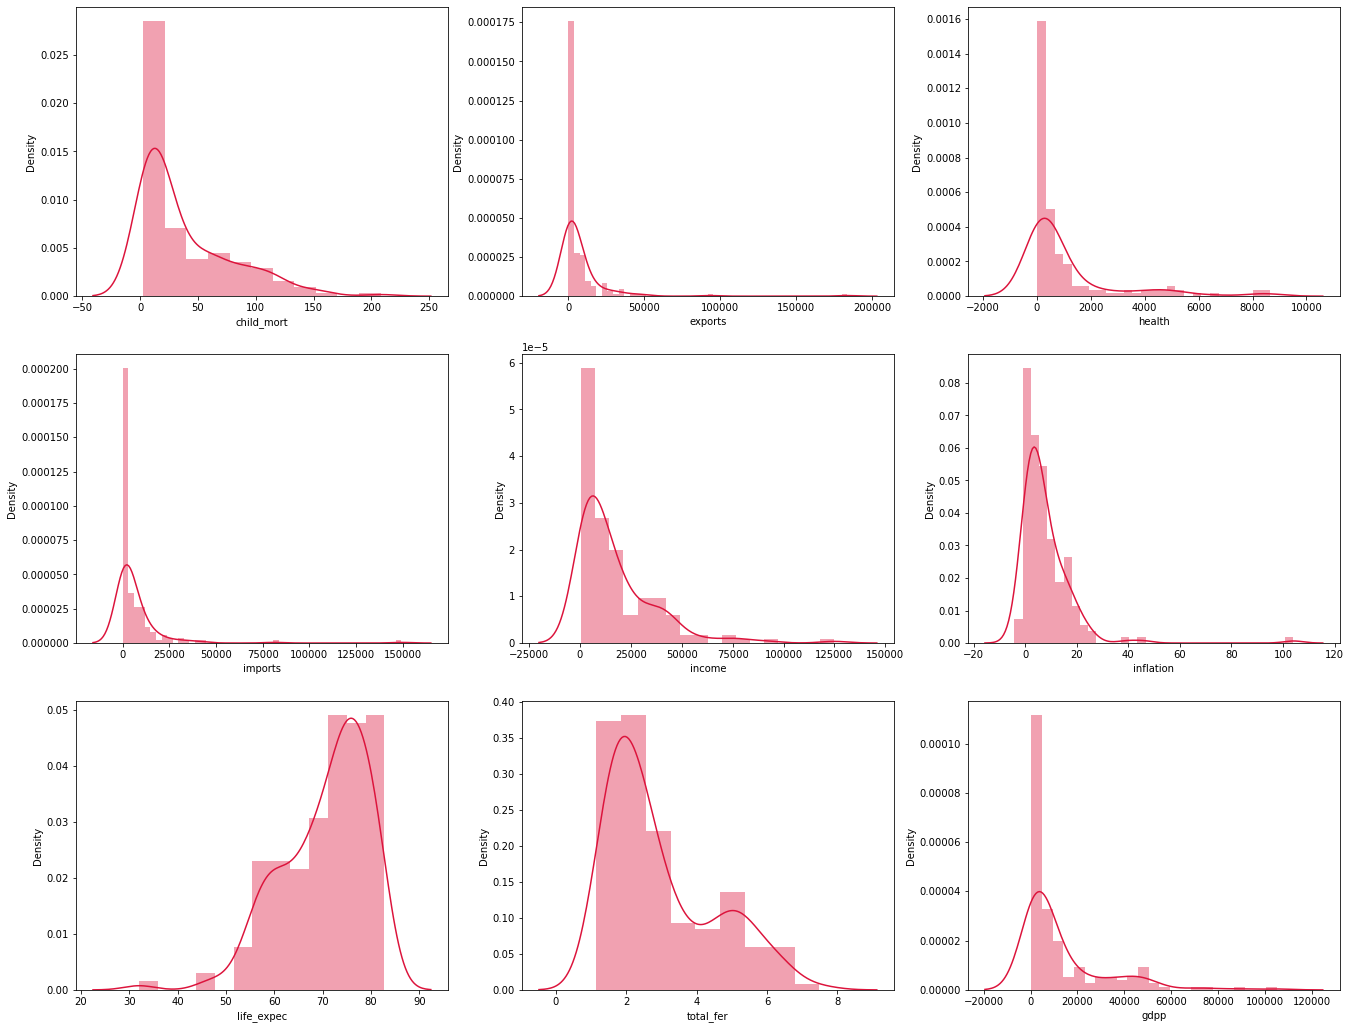

In [93]:
plt.figure(figsize = (18,14))
feature = country_df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(country_df[i[1]], color='crimson')
    plt.subplots_adjust(right=1.1)
    plt.subplots_adjust(top=1.1)

#### Inference:
- From above distribution plot it is seen that gdpp, income and child_mort has high variation.

### Step 4: Checking outliers in the features:

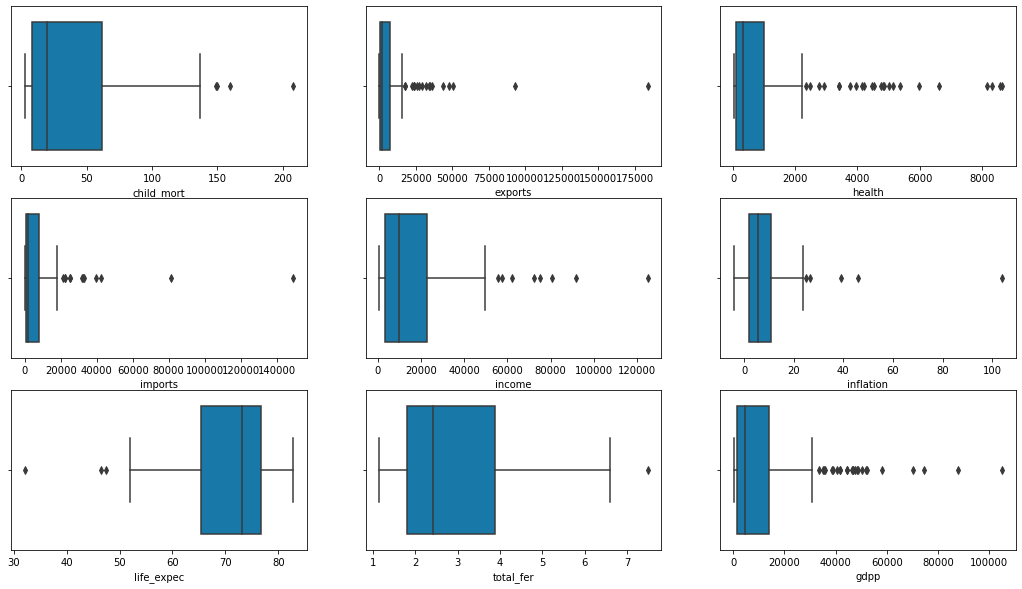

In [100]:
plt.figure(figsize = (18,10))
feature = country_df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(country_df[i[1]],palette='winter')

#### Inference:
- There are many outliers present in the feature variables.
- Clustering is very sensitive to outliers.
- Hence we need to cap the outliers to quantile values for analysis.

In [101]:
# Capping outliers to 5th and 95th percentile:

percentiles = country_df['child_mort'].quantile([0.05,0.95]).values
country_df['child_mort'][country_df['child_mort'] <= percentiles[0]] = percentiles[0]
country_df['child_mort'][country_df['child_mort'] >= percentiles[1]] = percentiles[1]

percentiles = country_df['health'].quantile([0.05,0.95]).values
country_df['health'][country_df['health'] <= percentiles[0]] = percentiles[0]
country_df['health'][country_df['health'] >= percentiles[1]] = percentiles[1]

percentiles = country_df['life_expec'].quantile([0.05,0.95]).values
country_df['life_expec'][country_df['life_expec'] <= percentiles[0]] = percentiles[0]
country_df['life_expec'][country_df['life_expec'] >= percentiles[1]] = percentiles[1]

percentiles = country_df['total_fer'].quantile([0.05,0.95]).values
country_df['total_fer'][country_df['total_fer'] <= percentiles[0]] = percentiles[0]
country_df['total_fer'][country_df['total_fer'] >= percentiles[1]] = percentiles[1]

percentiles = country_df['income'].quantile([0.05,0.95]).values
country_df['income'][country_df['income'] <= percentiles[0]] = percentiles[0]
country_df['income'][country_df['income'] >= percentiles[1]] = percentiles[1]

percentiles = country_df['inflation'].quantile([0.05,0.95]).values
country_df['inflation'][country_df['inflation'] <= percentiles[0]] = percentiles[0]
country_df['inflation'][country_df['inflation'] >= percentiles[1]] = percentiles[1]

percentiles = country_df['gdpp'].quantile([0.05,0.95]).values
country_df['gdpp'][country_df['gdpp'] <= percentiles[0]] = percentiles[0]
country_df['gdpp'][country_df['gdpp'] >= percentiles[1]] = percentiles[1]

percentiles = country_df['imports'].quantile([0.05,0.95]).values
country_df['imports'][country_df['imports'] <= percentiles[0]] = percentiles[0]
country_df['imports'][country_df['imports'] >= percentiles[1]] = percentiles[1]

percentiles = country_df['exports'].quantile([0.05,0.95]).values
country_df['exports'][country_df['exports'] <= percentiles[0]] = percentiles[0]
country_df['exports'][country_df['exports'] >= percentiles[1]] = percentiles[1]

In [104]:
country_df.describe(percentiles=[.25, .50, .75, .85, .90, .95])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,36.808623,5784.478503,954.366186,5142.509695,15755.491018,7.016075,70.830060,2.922389,12003.719162
std,36.193830,8579.136523,1453.198373,6694.383173,14770.353771,6.271398,8.039216,1.438264,15154.443890
min,3.460000,70.470000,26.716000,169.281000,1213.000000,0.183400,55.780000,1.390000,465.900000
25%,8.250000,447.140000,78.535000,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.890000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
85%,88.310000,12667.230000,2202.666000,11434.140000,36200.000000,15.330000,79.910000,5.023000,31090.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,30756.570000,4931.330700,23694.552000,47513.000000,20.849000,81.400000,5.854700,48547.000000


### Step 5: Clustering

#### Performing Hopkins test to check the clustering tendency of our data set

In [105]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [108]:
print(hopkins(country_df.drop('country', axis = 1)))

0.8499839273257558


- Since the value is above 0.8, the data set has high tendency to cluster.

### Scaling:

In [112]:
# Scaling the variables:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(country_df.drop('country', axis = 1))

scaled_df = pd.DataFrame(scaled_df, columns = country_df.columns[1:])
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.479588,-0.668039,-0.629777,-0.733291,-0.960575,0.387667,-1.825310,2.020718,-0.757874
1,-0.560024,-0.542389,-0.473804,-0.472674,-0.395590,-0.404004,0.682454,-0.887331,-0.523775
2,-0.263504,-0.476048,-0.530345,-0.560668,-0.193907,1.452825,0.707406,-0.022587,-0.499286
3,2.194560,-0.419165,-0.589275,-0.543598,-0.669255,2.215708,-1.338729,2.049310,-0.560839
4,-0.734610,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.744836,-0.552591,0.012991


### K-Means Clustering

#### Using Silhoutte Score & Elbow curve to determine the value of K

For n_clusters=2, the silhouette score is 0.4844790300865431
For n_clusters=3, the silhouette score is 0.4203919605612414
For n_clusters=4, the silhouette score is 0.38798586921436806
For n_clusters=5, the silhouette score is 0.300347270905367
For n_clusters=6, the silhouette score is 0.29716906512944874
For n_clusters=7, the silhouette score is 0.33611178279397946
For n_clusters=8, the silhouette score is 0.31939092365538235
For n_clusters=9, the silhouette score is 0.32638169995674116
For n_clusters=10, the silhouette score is 0.3300297740791342


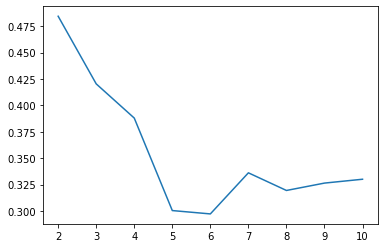

In [126]:
# Silhoutte Score:

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
sil_score = []
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    sil_score.append([num_clusters, silhouette_avg])
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
sil_score_df = pd.DataFrame(sil_score)
plt.plot(sil_score_df[0], sil_score_df[1])

plt.show()

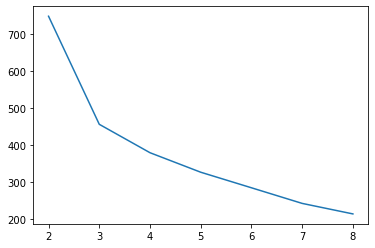

In [128]:
# Elbow-curve / SSD:

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    
    ssd.append([num_clusters,kmeans.inertia_])

ssd_df = pd.DataFrame(ssd)
plt.plot(ssd_df[0], ssd_df[1])
plt.show()

#### Inference:
- From the silhoutte analysis and the elbow curve, it is clear that the cut-off of k=3 would be optimal to go with.

### Final Model:

In [129]:
# Final model with k=3:

kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(scaled_df)

KMeans(max_iter=50, n_clusters=3)

In [130]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [131]:
# Assign the label to a new variable 'cluster_id':

kmeans_df = country_df.copy()


kmeans_df['cluster_id'] = kmeans.labels_
kmeans_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,70.47,41.92,248.30,1610.0,9.44,56.2,5.820,553.0,0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.650,4090.0,2
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.890,4460.0,2
3,Angola,116.0,2199.19,100.60,1514.37,5900.0,20.87,60.1,5.861,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.130,12200.0,2


In [133]:
kmeans_df.cluster_id.value_counts()

2    82
0    48
1    37
Name: cluster_id, dtype: int64

#### Inference: 
- From the above clustering we see that the cluster 2 is having a lot of data points compared to other two clusters.

### Visualizing the clusters with other variables

#### Child mortality vs GDP vs Clusters

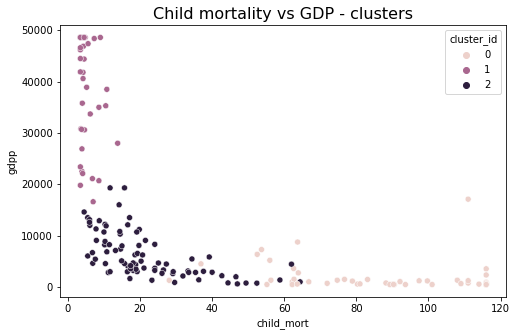

In [138]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_id', data = kmeans_df)
plt.title('Child mortality vs GDP - clusters', size=16 )
plt.show()

#### Income vs GDP vs Clusters

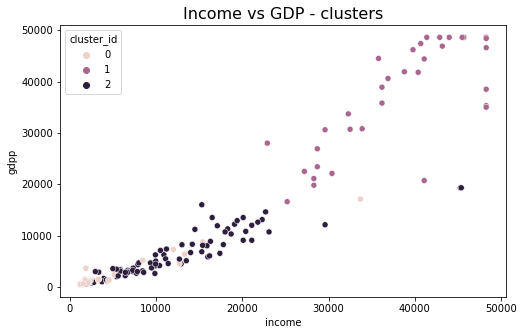

In [140]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'cluster_id', data = kmeans_df)
plt.title('Income vs GDP - clusters', size=16)
plt.show()

#### Child mortality vs Income vs Clusters

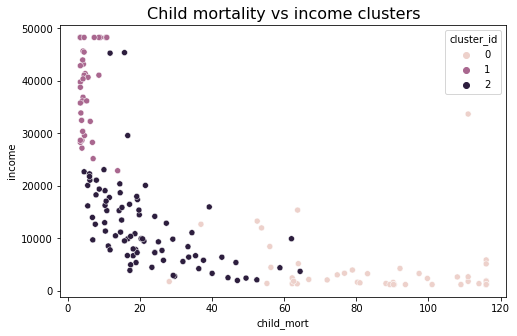

In [142]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_id', data = kmeans_df)
plt.title('Child mortality vs Income - clusters', size=16)
plt.show()

### Cluster Profiling

In [144]:
# Getting the cluster centers to visualize with other variables:

profiled_df = kmeans_df.drop('country', axis = 1).groupby('cluster_id').mean()
profiled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0,86.443750,882.076250,115.900875,831.851813,3955.562500,9.889271,60.310833,4.886021,1926.231250
1,5.344324,18780.372973,3285.879162,15698.857838,38711.081081,2.834373,79.805405,1.767838,37745.675676
2,21.951220,2790.176220,393.151000,2902.591366,12304.756098,7.221071,72.937805,2.293902,6287.463415


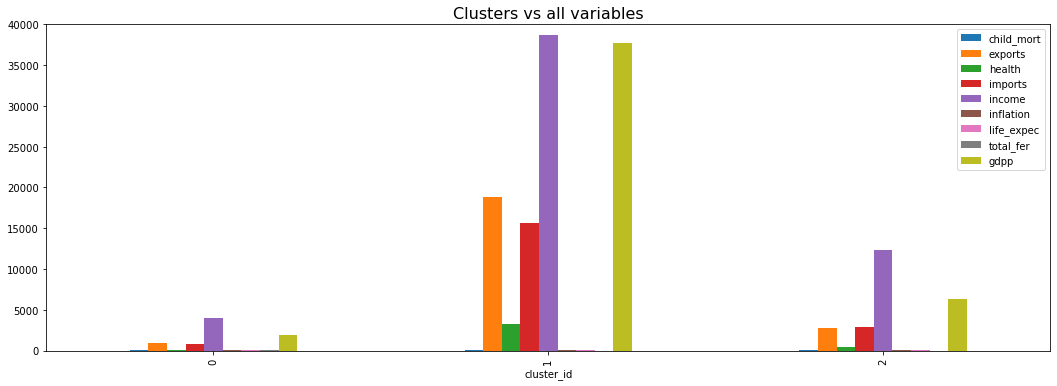

In [147]:
kmeans_df.drop('country', axis = 1).groupby('cluster_id').mean().plot.bar(figsize=(18,6))
plt.ylim([0,40000])
plt.title("Clusters vs all variables", size=16)
plt.show()

#### Inference:
- Cluster 1 has the highest income and GDP
- Cluster 0 has lowest income and GDP

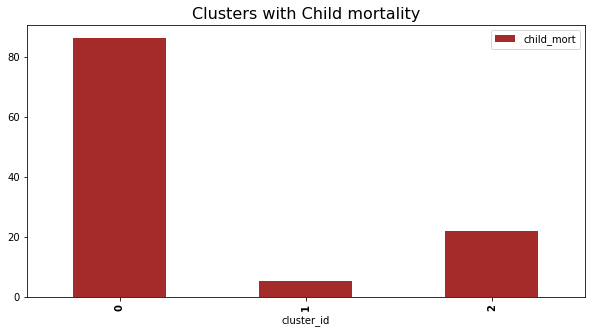

In [151]:
# Analysing child mortality with clusters:

kmeans_df.drop(['country', 'exports', 'health', 'imports','income', 'gdpp',
       'inflation', 'life_expec', 'total_fer'],axis = 1).groupby('cluster_id').mean().plot.bar(figsize=(10,5),color='brown')
plt.title('Clusters with Child mortality', size=16)
plt.xticks(fontweight='bold')
plt.show()

#### Inference:
- Cluster 0 has the highest child mortality rate
- Cluster 1 has the least mortality rate.

### Final Inference from K-Means Clustering:
- Cluster 0 is having high child mortality, very low income and very low GDP
- Cluster 1 is having least child mortality, highest income and GDP
- Cluster 2 is having considerable child mortality, low income and low GDP.

Hence it is clear that countries under cluster 0 are the ones in need of help. Hence these countries can be selected for help by the HELP International NGO.

In [153]:
#Sorting based on high child mortality,low income and GDP

final=kmeans_df[kmeans_df['cluster_id'] == 0].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False, True, True])
final.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
31,Central African Republic,116.0,70.47,26.716,169.281,1213.0,2.01,55.78,5.210,465.9,0
37,"Congo, Dem. Rep.",116.0,137.27,26.716,169.281,1213.0,20.80,57.50,5.861,465.9,0
112,Niger,116.0,77.26,26.716,170.870,1213.0,2.55,58.80,5.861,465.9,0
132,Sierra Leone,116.0,70.47,52.270,169.281,1220.0,17.20,55.78,5.200,465.9,0
25,Burkina Faso,116.0,110.40,38.760,170.200,1430.0,6.81,57.90,5.861,575.0,0
66,Haiti,116.0,101.29,45.740,428.310,1500.0,5.45,55.78,3.330,662.0,0
97,Mali,116.0,161.42,35.260,248.510,1870.0,4.37,59.50,5.861,708.0,0
32,Chad,116.0,330.10,40.630,390.200,1930.0,6.39,56.50,5.861,897.0,0
113,Nigeria,116.0,589.49,118.130,405.420,5150.0,20.87,60.50,5.840,2330.0,0
3,Angola,116.0,2199.19,100.600,1514.370,5900.0,20.87,60.10,5.861,3530.0,0


In [154]:
# Top 10 countries which are in need of aid the most:

final_countries=final[['country']].head(10)
final_c = final_countries.reset_index(drop=True)
final_c

Top 10 countries which are in need of aid the most


,country
0,Central African Republic
1,"Congo, Dem. Rep."
2,Niger
3,Sierra Leone
4,Burkina Faso
5,Haiti
6,Mali
7,Chad
8,Nigeria
9,Angola


### Hierarchical Clustering:

In [155]:
# Using the dataframe obtained in the previous clustering method:

kmeans_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,70.47,41.92,248.30,1610.0,9.44,56.2,5.820,553.0,0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.650,4090.0,2
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.890,4460.0,2
3,Angola,116.0,2199.19,100.60,1514.37,5900.0,20.87,60.1,5.861,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.130,12200.0,2


In [156]:
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.479588,-0.668039,-0.629777,-0.733291,-0.960575,0.387667,-1.825310,2.020718,-0.757874
1,-0.560024,-0.542389,-0.473804,-0.472674,-0.395590,-0.404004,0.682454,-0.887331,-0.523775
2,-0.263504,-0.476048,-0.530345,-0.560668,-0.193907,1.452825,0.707406,-0.022587,-0.499286
3,2.194560,-0.419165,-0.589275,-0.543598,-0.669255,2.215708,-1.338729,2.049310,-0.560839
4,-0.734610,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.744836,-0.552591,0.012991


#### Single Linkage:


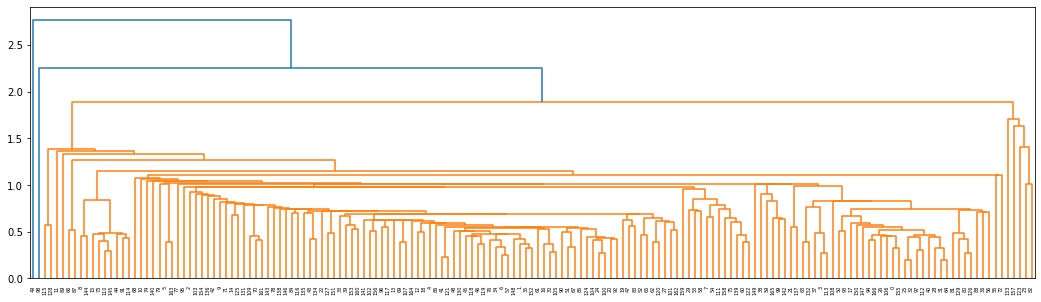

In [159]:
# single linkage
plt.figure(figsize=(18,5))
mergings = linkage(scaled_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Inference:
- From above it is clearly seen that, single linkage doesn't produce a good enough result for us to analyse the clusters. Hence, we need to go ahead and utilise the complete linkage method.

#### Complete Linkage

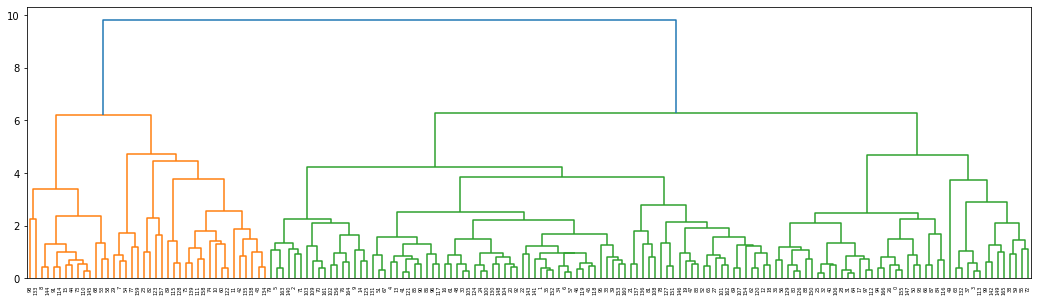

In [163]:
# complete linkage
plt.figure(figsize=(18,5))
mergings = linkage(scaled_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Inference:
- Now we have got a clear dendogram. 
- Lets consider a threshold of 6. If we cut a horizontal line we would get 4 clusters.

In [164]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 3, 1, 2, 2, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       3, 1, 1, 1, 1, 0, 0, 1, 1, 3, 2, 0, 0, 1, 3, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 3, 1, 1, 1, 0, 3, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       0, 2, 1, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       3, 2, 0, 0, 3, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 3, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 3, 3, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [165]:
# Assign the label to a new variable 'cluster_id':

hier_df = country_df.copy()

hier_df['cluster_labels'] = cluster_labels
hier_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,70.47,41.92,248.30,1610.0,9.44,56.2,5.820,553.0,0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.650,4090.0,1
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.890,4460.0,1
3,Angola,116.0,2199.19,100.60,1514.37,5900.0,20.87,60.1,5.861,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.130,12200.0,1


In [166]:
hier_df.cluster_labels.value_counts()

1    84
0    43
2    26
3    14
Name: cluster_labels, dtype: int64

#### Inference:
- Cluster 1 has the highest number of data points.

### Visualising the clusters with variables:

#### Clusters vs Child Mortality

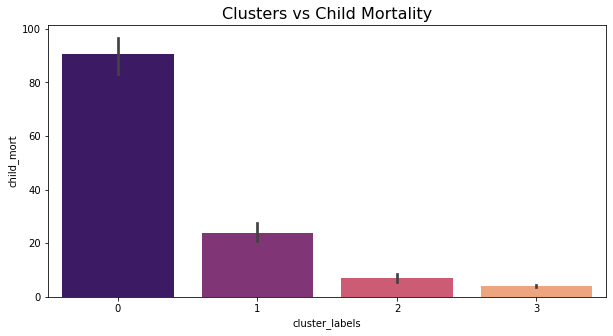

In [172]:
# plots
plt.figure(figsize = (10,5))
sns.barplot(x='cluster_labels', y='child_mort', data=hier_df,palette='magma')
plt.title('Clusters vs Child Mortality', size=16)
plt.show()

#### Inference:
- Cluster 0 has the highest child mortality rate.
- Cluster 3 has the least.

#### Clusters vs GDP

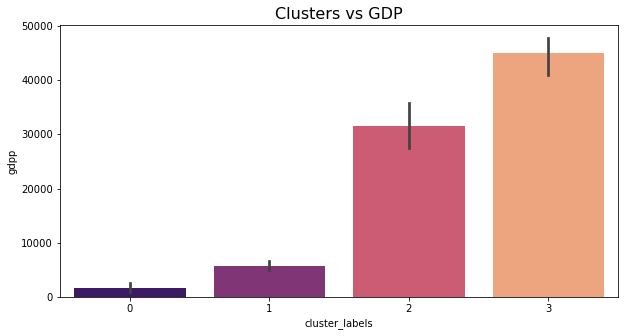

In [173]:
# plots
plt.figure(figsize = (10,5))
sns.barplot(x='cluster_labels', y='gdpp', data=hier_df, palette='magma')
plt.title('Clusters vs GDP', size=16)
plt.show()

#### Inference:
- Cluster 3 has the highest GDP
- Cluster 0 has the lowest GDP

#### Clusters vs Income

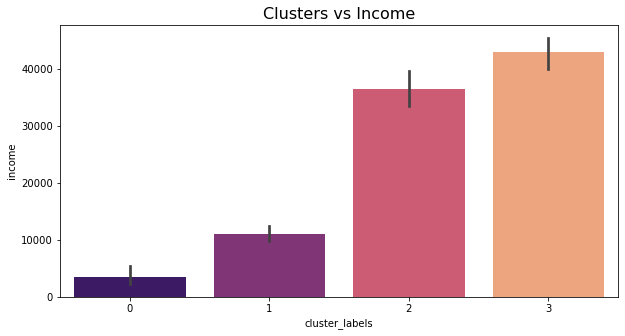

In [174]:
plt.figure(figsize = (10,5))
sns.barplot(x='cluster_labels', y='income', data=hier_df, palette='magma')
plt.title('Clusters vs Income', size=16)
plt.show()

#### Inference:
- Cluster 3 has the highest income.
- Cluster 0 has the lowest income.

### Final Inference from Hierarchical Clustering:
- Cluster 0 is having high child mortality, very low income and GDP.
- Cluster 1 is having considerable child mortality, low income and GDP.
- Cluster 2 is having low child mortality, high income and GDP.
- Cluster 3 is having very low child mortality, very high income and GDP.


Hence it is clear that countries under cluster 0 are the ones in need of help. Hence these countries can be selected for help by the HELP International NGO.

In [175]:
hier_df1=hier_df[hier_df['cluster_labels'] == 0].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False,True, True])
hier_df1.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
31,Central African Republic,116.0,70.47,26.716,169.281,1213.0,2.01,55.78,5.210,465.9,0
37,"Congo, Dem. Rep.",116.0,137.27,26.716,169.281,1213.0,20.80,57.50,5.861,465.9,0
112,Niger,116.0,77.26,26.716,170.870,1213.0,2.55,58.80,5.861,465.9,0
132,Sierra Leone,116.0,70.47,52.270,169.281,1220.0,17.20,55.78,5.200,465.9,0
25,Burkina Faso,116.0,110.40,38.760,170.200,1430.0,6.81,57.90,5.861,575.0,0
66,Haiti,116.0,101.29,45.740,428.310,1500.0,5.45,55.78,3.330,662.0,0
97,Mali,116.0,161.42,35.260,248.510,1870.0,4.37,59.50,5.861,708.0,0
32,Chad,116.0,330.10,40.630,390.200,1930.0,6.39,56.50,5.861,897.0,0
113,Nigeria,116.0,589.49,118.130,405.420,5150.0,20.87,60.50,5.840,2330.0,0
3,Angola,116.0,2199.19,100.600,1514.370,5900.0,20.87,60.10,5.861,3530.0,0


In [176]:
# 5 countries which are in direst need of aid based on hierarchical clustering:

final_hier=hier_df1[['country']].head()
hier= final_hier.reset_index(drop=True)
hier

,country
0,Central African Republic
1,"Congo, Dem. Rep."
2,Niger
3,Sierra Leone
4,Burkina Faso


### Step 6: Final Result

#### From K means clustering we got better clusters (less) compared to Hierarchical clustering.
#### Cluster 0 is the better cluster we got with High child mortality, low income and low GDP.

#### Final 10 countries from K-Means:

In [179]:
Kmean=kmeans_df[kmeans_df['cluster_id'] == 0]
Kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,70.47,41.92,248.30,1610.0,9.440,56.2,5.820,553.0,0
3,Angola,116.0,2199.19,100.60,1514.37,5900.0,20.870,60.1,5.861,3530.0,0
17,Benin,111.0,180.40,31.08,281.98,1820.0,0.885,61.8,5.360,758.0,0
21,Botswana,52.5,2768.60,527.05,3257.55,13300.0,8.920,57.1,2.880,6350.0,0
25,Burkina Faso,116.0,110.40,38.76,170.20,1430.0,6.810,57.9,5.861,575.0,0


In [180]:
Kmean=Kmean.sort_values(by=['child_mort','income','gdpp'], ascending=[False,True,True])
Kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
31,Central African Republic,116.0,70.47,26.716,169.281,1213.0,2.01,55.78,5.210,465.9,0
37,"Congo, Dem. Rep.",116.0,137.27,26.716,169.281,1213.0,20.80,57.50,5.861,465.9,0
112,Niger,116.0,77.26,26.716,170.870,1213.0,2.55,58.80,5.861,465.9,0
132,Sierra Leone,116.0,70.47,52.270,169.281,1220.0,17.20,55.78,5.200,465.9,0
25,Burkina Faso,116.0,110.40,38.760,170.200,1430.0,6.81,57.90,5.861,575.0,0


In [181]:
# 10 Countries based on high child mortality, low income and low GDP:

Kmean[['country']].head(10)

10 Countries based on high child mortality, low income and low GDP


,country
31,Central African Republic
37,"Congo, Dem. Rep."
112,Niger
132,Sierra Leone
25,Burkina Faso
66,Haiti
97,Mali
32,Chad
113,Nigeria
3,Angola


In [182]:
Kmean.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,86.443750,882.076250,115.900875,831.851812,3955.562500,9.889271,60.310833,4.886021,1926.231250,0.0
std,24.685467,2251.341805,164.893709,1538.779378,5558.912789,6.824260,4.031335,0.881091,2916.849968,0.0
min,28.100000,70.470000,26.716000,169.281000,1213.000000,0.885000,55.780000,2.590000,465.900000,0.0
25%,63.675000,102.872500,34.005000,193.320000,1390.000000,4.080000,56.725000,4.475000,551.500000,0.0
50%,89.750000,196.260000,51.615000,339.305000,1860.000000,8.855000,59.800000,5.055000,932.000000,0.0
75%,111.000000,552.522500,95.305000,801.000000,3522.500000,16.600000,62.825000,5.597500,1465.000000,0.0
max,116.000000,14671.800000,766.080000,10071.900000,33700.000000,20.870000,71.100000,5.861000,17100.000000,0.0


#### Choosing countries based on socio economic and health factors:


In [184]:
# Mean value of child mortality is 86.44. Choosing countries with value more than this:

df_final_list = Kmean[Kmean['child_mort']>86]
df_final_list.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.0
mean,106.011538,841.016538,75.569231,747.012885,3276.038462,9.284423,58.783077,5.207962,1508.930769,0.0
std,10.899039,2853.008609,143.562272,1928.664473,6335.198159,7.004906,3.419037,0.731984,3252.299874,0.0
min,88.200000,70.470000,26.716000,169.281000,1213.000000,0.885000,55.780000,3.300000,465.900000,0.0
25%,94.550000,86.447500,30.457500,176.287500,1213.000000,3.940000,55.885000,5.027500,465.900000,0.0
50%,111.000000,138.835000,38.675000,279.780000,1465.000000,6.600000,57.800000,5.290000,655.000000,0.0
75%,116.000000,320.280000,52.757500,403.457500,2590.000000,15.150000,60.400000,5.855750,1137.500000,0.0
max,116.000000,14671.800000,766.080000,10071.900000,33700.000000,20.870000,68.200000,5.861000,17100.000000,0.0


In [185]:
# Mean of income is 3276.04. Choosing countries with values less than this:

df_final_list1 = df_final_list[df_final_list['income']<3276]
df_final_list1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,105.895238,174.150000,42.874000,309.261190,1563.190476,7.094524,57.779048,5.222190,668.200000,0.0
std,11.129532,143.016882,23.088854,225.056283,486.485726,5.604743,2.556986,0.730369,268.078295,0.0
min,88.200000,70.470000,26.716000,169.281000,1213.000000,0.885000,55.780000,3.300000,465.900000,0.0
25%,93.600000,77.260000,30.250000,170.200000,1213.000000,2.970000,55.780000,5.050000,465.900000,0.0
50%,111.000000,126.880000,37.330000,248.510000,1390.000000,5.450000,57.300000,5.310000,553.000000,0.0
75%,116.000000,196.180000,45.740000,353.700000,1820.000000,9.440000,58.700000,5.861000,758.000000,0.0
max,116.000000,617.320000,129.870000,1181.700000,2690.000000,20.800000,65.900000,5.861000,1310.000000,0.0


In [187]:
# Mean value of GDP is 668.20. Choosing countries with values less than this:

df_final_list2 = df_final_list1[df_final_list1['gdpp']<668]
df_final_list2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
31,Central African Republic,116.0,70.47,26.716,169.281,1213.0,2.01,55.78,5.210,465.9,0
37,"Congo, Dem. Rep.",116.0,137.27,26.716,169.281,1213.0,20.80,57.50,5.861,465.9,0
112,Niger,116.0,77.26,26.716,170.870,1213.0,2.55,58.80,5.861,465.9,0
132,Sierra Leone,116.0,70.47,52.270,169.281,1220.0,17.20,55.78,5.200,465.9,0
25,Burkina Faso,116.0,110.40,38.760,170.200,1430.0,6.81,57.90,5.861,575.0,0
66,Haiti,116.0,101.29,45.740,428.310,1500.0,5.45,55.78,3.330,662.0,0
64,Guinea-Bissau,114.0,81.50,46.500,192.540,1390.0,2.97,55.78,5.050,547.0,0
63,Guinea,109.0,196.34,31.950,279.940,1213.0,16.10,58.00,5.340,648.0,0
106,Mozambique,101.0,131.99,26.716,193.580,1213.0,7.64,55.78,5.560,465.9,0
26,Burundi,93.6,70.47,26.800,169.281,1213.0,12.30,57.70,5.861,465.9,0


#### List of countries in need of aid based on socio economic factors:

In [188]:
countries=df_final_list2['country']
countries=countries.reset_index(drop=True)
countries

0     Central African Republic
1             Congo, Dem. Rep.
2                        Niger
3                 Sierra Leone
4                 Burkina Faso
5                        Haiti
6                Guinea-Bissau
7                       Guinea
8                   Mozambique
9                      Burundi
10                      Malawi
11                        Togo
12                 Afghanistan
13                     Liberia
Name: country, dtype: object

#### Inference:
- From above we see that the final list of 5 countires from all the analysis are same.
- Hence these 5 countries are suggested to be aided.

#### The 5 countries which are in direst need of aid are:
1. Central African Republic
2. Congo, Dem. Rep.
3. Niger
4. Burkina Faso
5. Haiti